In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math

## 1. Summary statistics of all the defects

In [43]:
df = pd.read_csv('defect_3500.csv')
df.describe()

# 25% quantile defWidth = 0.011135
width_small = 0.011135

In [108]:
# df = pd.read_csv('2D_model_prediction_results.csv')
df = pd.read_csv('2D_model_prediction_results.csv')

df_summary = df.describe().drop(columns=['index','defWidth','defHeight','defPosx','defPosy','defAng','defAngR'])
df_summary


,MSE,MSE_modified,MSE_modified_das,MSE_modified_defect,MSE_modified_defect_DAS
count,1050.000000,1050.000000,1050.000000,1050.000000,1050.000000
mean,0.012138,0.003588,0.068311,0.925748,1.482955
std,0.016539,0.004734,0.004339,0.093998,0.089848
min,0.000013,0.000002,0.061205,0.617958,1.202511
25%,0.000106,0.000053,0.065324,0.856828,1.423687
50%,0.002904,0.001009,0.067107,0.948846,1.482734
75%,0.020384,0.006283,0.070113,1.000000,1.545519
max,0.092477,0.022727,0.091812,1.329894,1.910013


In [109]:
df_summary.loc['mean']

MSE                        0.012138
MSE_modified               0.003588
MSE_modified_das           0.068311
MSE_modified_defect        0.925748
MSE_modified_defect_DAS    1.482955
Name: mean, dtype: float64

### Small defect vs large defect

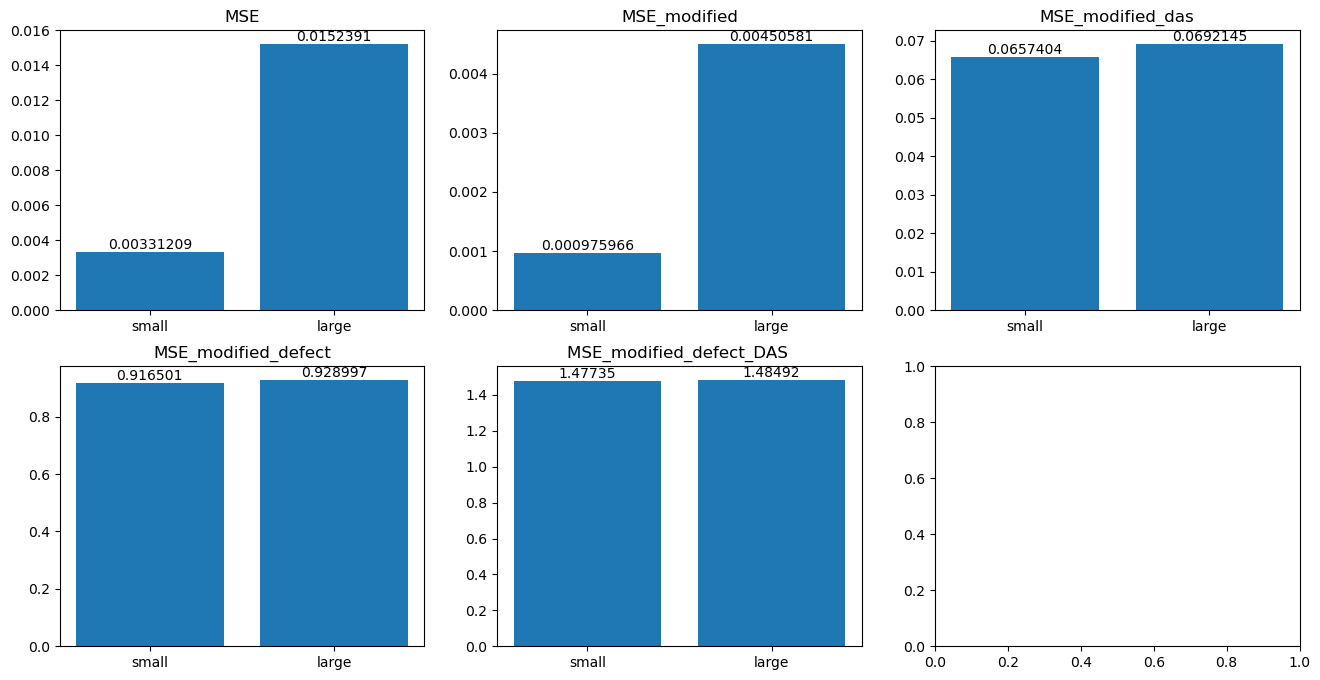

In [66]:
df_small_defect = df[df.defWidth < width_small]
df_s = df_small_defect.describe().loc['mean']

df_large_defect = df[df.defWidth > width_small]
df_l = df_large_defect.describe().loc['mean']

size = ['small', 'large']
fig, ax = plt.subplots(2,3, figsize = [16,8])
ax[0, 0].bar(size, [df_s.MSE, df_l.MSE])
ax[0, 0].set_title('MSE')

for bars in ax[0, 0].containers:
    ax[0, 0].bar_label(bars)

ax[0, 1].bar(size, [df_s.MSE_modified, df_l.MSE_modified])
ax[0, 1].set_title('MSE_modified')

for bars in ax[0, 1].containers:
    ax[0, 1].bar_label(bars)

ax[0, 2].bar(size, [df_s.MSE_modified_das, df_l.MSE_modified_das])
ax[0, 2].set_title('MSE_modified_das')

for bars in ax[0, 2].containers:
    ax[0, 2].bar_label(bars)

ax[1, 0].bar(size, [df_s.MSE_modified_defect, df_l.MSE_modified_defect])
ax[1, 0].set_title('MSE_modified_defect')

for bars in ax[1, 0].containers:
    ax[1, 0].bar_label(bars)

ax[1, 1].bar(size, [df_s.MSE_modified_defect_DAS , df_l.MSE_modified_defect_DAS ])
ax[1, 1].set_title('MSE_modified_defect_DAS ')

for bars in ax[1, 1].containers:
    ax[1, 1].bar_label(bars)

### Identify the low loss characteristic

In [126]:
df = pd.read_csv('2D_model_prediction_results.csv')
df['x_over_y'] = df.defPosx / df.defPosy 

In [133]:
threshold = df_summary.MSE_modified.loc['25%']
df_filter = df[df.MSE_modified <= threshold]
df_stats = df_filter.describe()
df_stats.loc['std'] / df_stats.loc['mean'] * 100

index                      6.518682e+00
defWidth                   7.918868e+01
defHeight                  6.517616e-14
defPosx                   -9.829102e+02
defPosy                    3.514369e+01
defAng                    -2.369023e+03
defAngR                   -2.369023e+03
MSE                        4.626559e+01
MSE_modified               4.864549e+01
MSE_modified_das           5.547198e+00
MSE_modified_defect        7.496395e+00
MSE_modified_defect_DAS    5.774160e+00
x_over_y                  -1.073632e+03
dtype: float64

The threshold is 5.2779064390051644e-05
The threshold is 0.00628330931067465


(-90.0, 90.0)

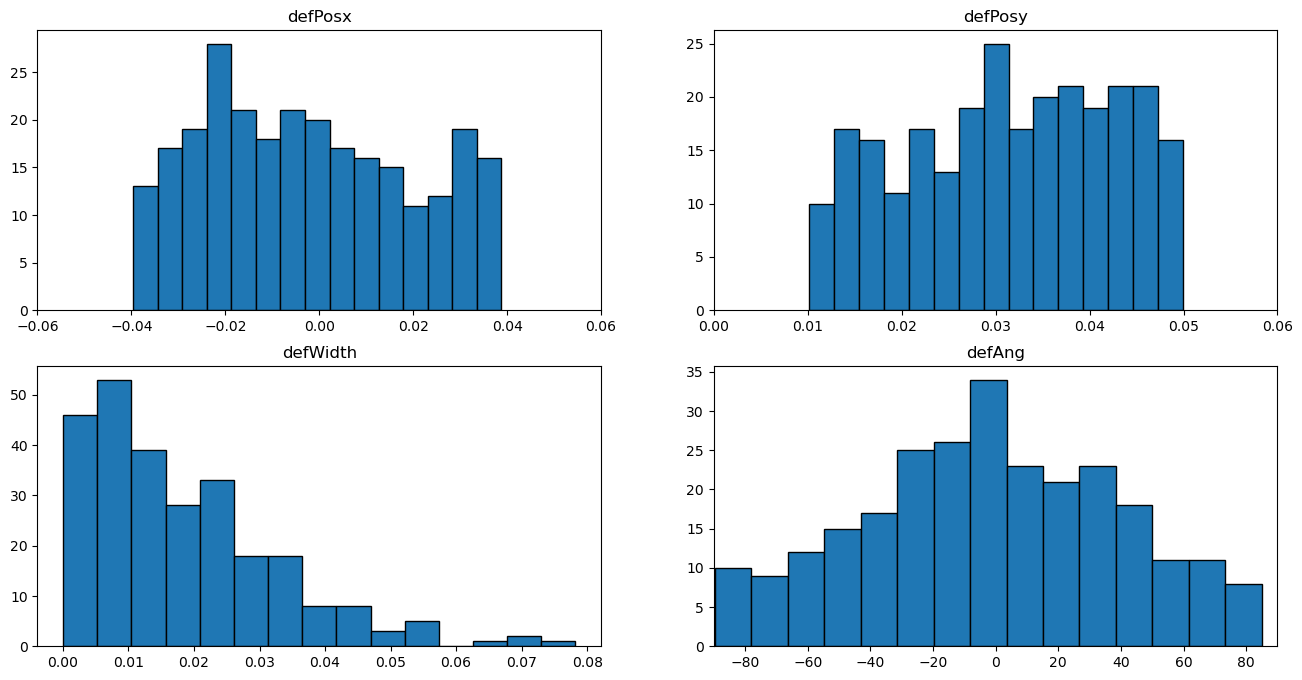

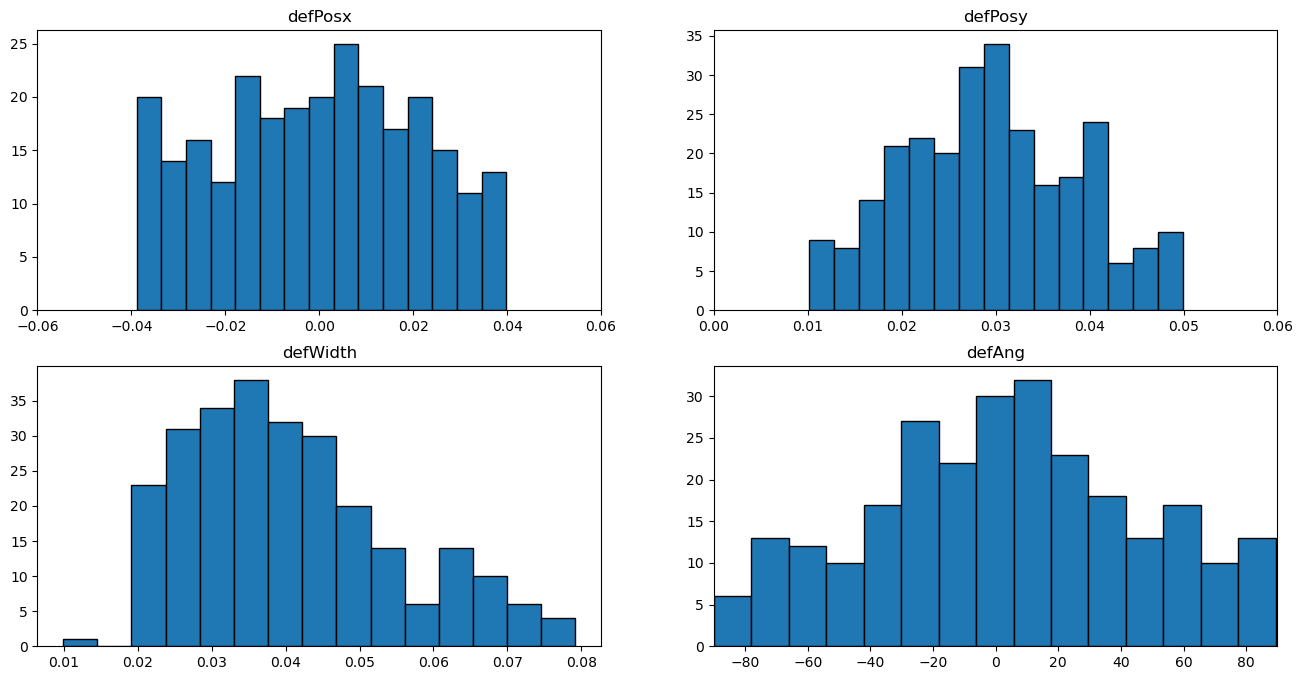

In [122]:

threshold = df_summary.MSE_modified.loc['25%']
bins = 15
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified <= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)

threshold = df_summary.MSE_modified.loc['75%']
print(f'The threshold is {threshold}')

df_filter = df[df.MSE_modified >= threshold]

fig, ax = plt.subplots(2,2, figsize = [16,8])
frq, edges = np.histogram(df_filter.defPosx, bins)
ax[0,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,0].set_xlim(-0.06, 0.06)
ax[0,0].set_title('defPosx')

frq, edges = np.histogram(df_filter.defPosy, bins)
ax[0,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[0,1].set_xlim(0, 0.06)
ax[0,1].set_title('defPosy')

frq, edges = np.histogram(df_filter.defWidth, bins)
ax[1,0].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,0].set_title('defWidth')

frq, edges = np.histogram(df_filter.defAng, bins)
ax[1,1].bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")
ax[1,1].set_title('defAng')
ax[1,1].set_xlim(-90, 90)


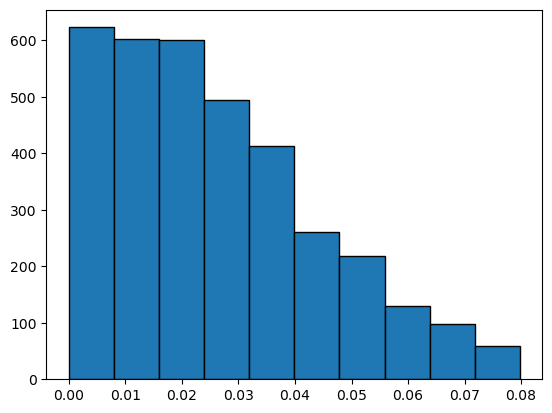

In [28]:
frq, edges = np.histogram(defwidth, 10)

fig, ax = plt.subplots()
ax.bar(edges[:-1], frq, width=np.diff(edges), edgecolor="black", align="edge")

plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x113de0820>,
 'caps': [<matplotlib.lines.Line2D at 0x113de0dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x113de0550>],
 'medians': [<matplotlib.lines.Line2D at 0x113df03a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x113df0670>],
 'means': []}

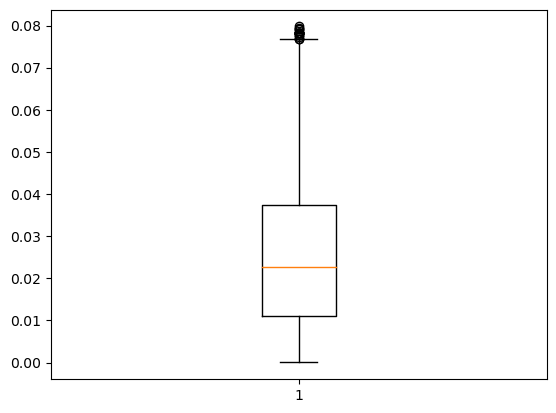

In [29]:
plt.boxplot(defwidth)